## 1. Organizing Tabular Data in Python

Information can come in many forms, and part of a data scientist's job is making sure that information is organized in a way that's conducive to analysis.
Take for example these five houses from the Mexico real estate dataset we'll use in this project:

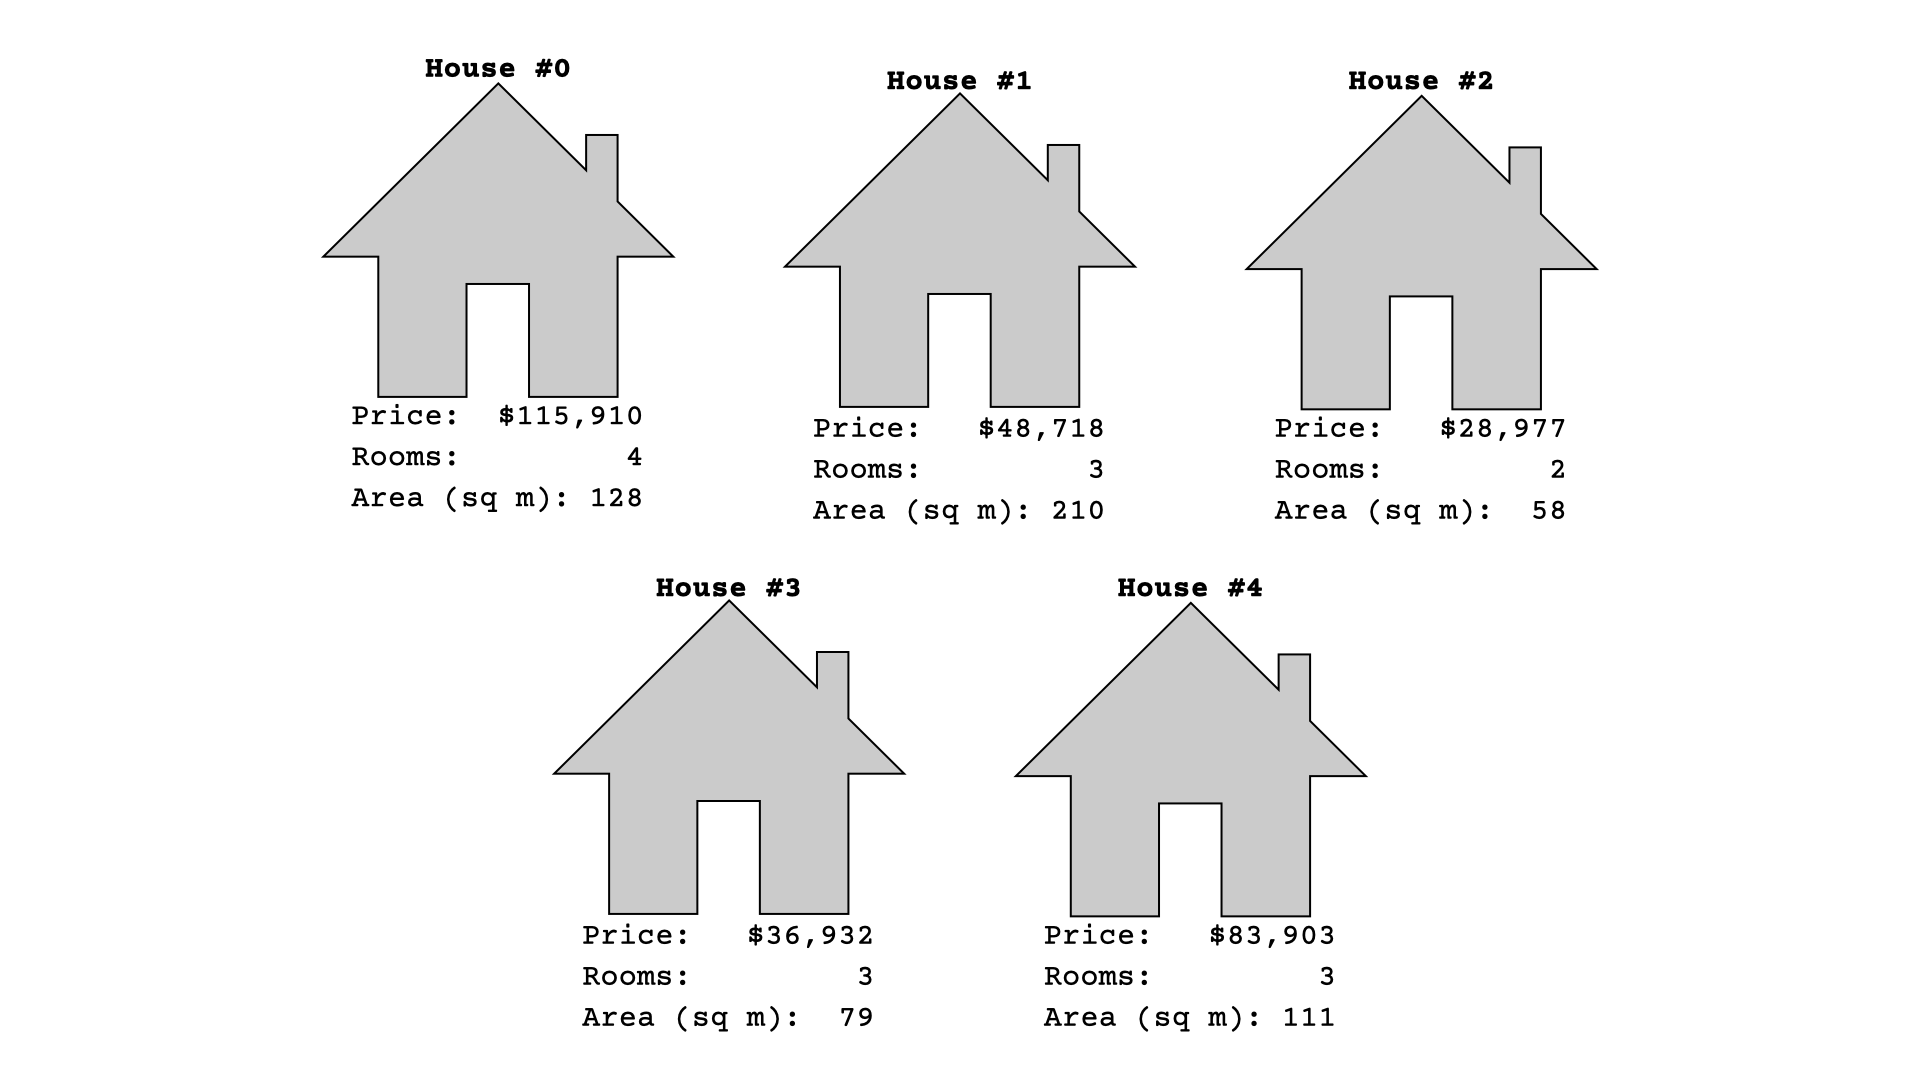

One common way to organize this information is in a table, which is a group of cells organized into rows and columns:


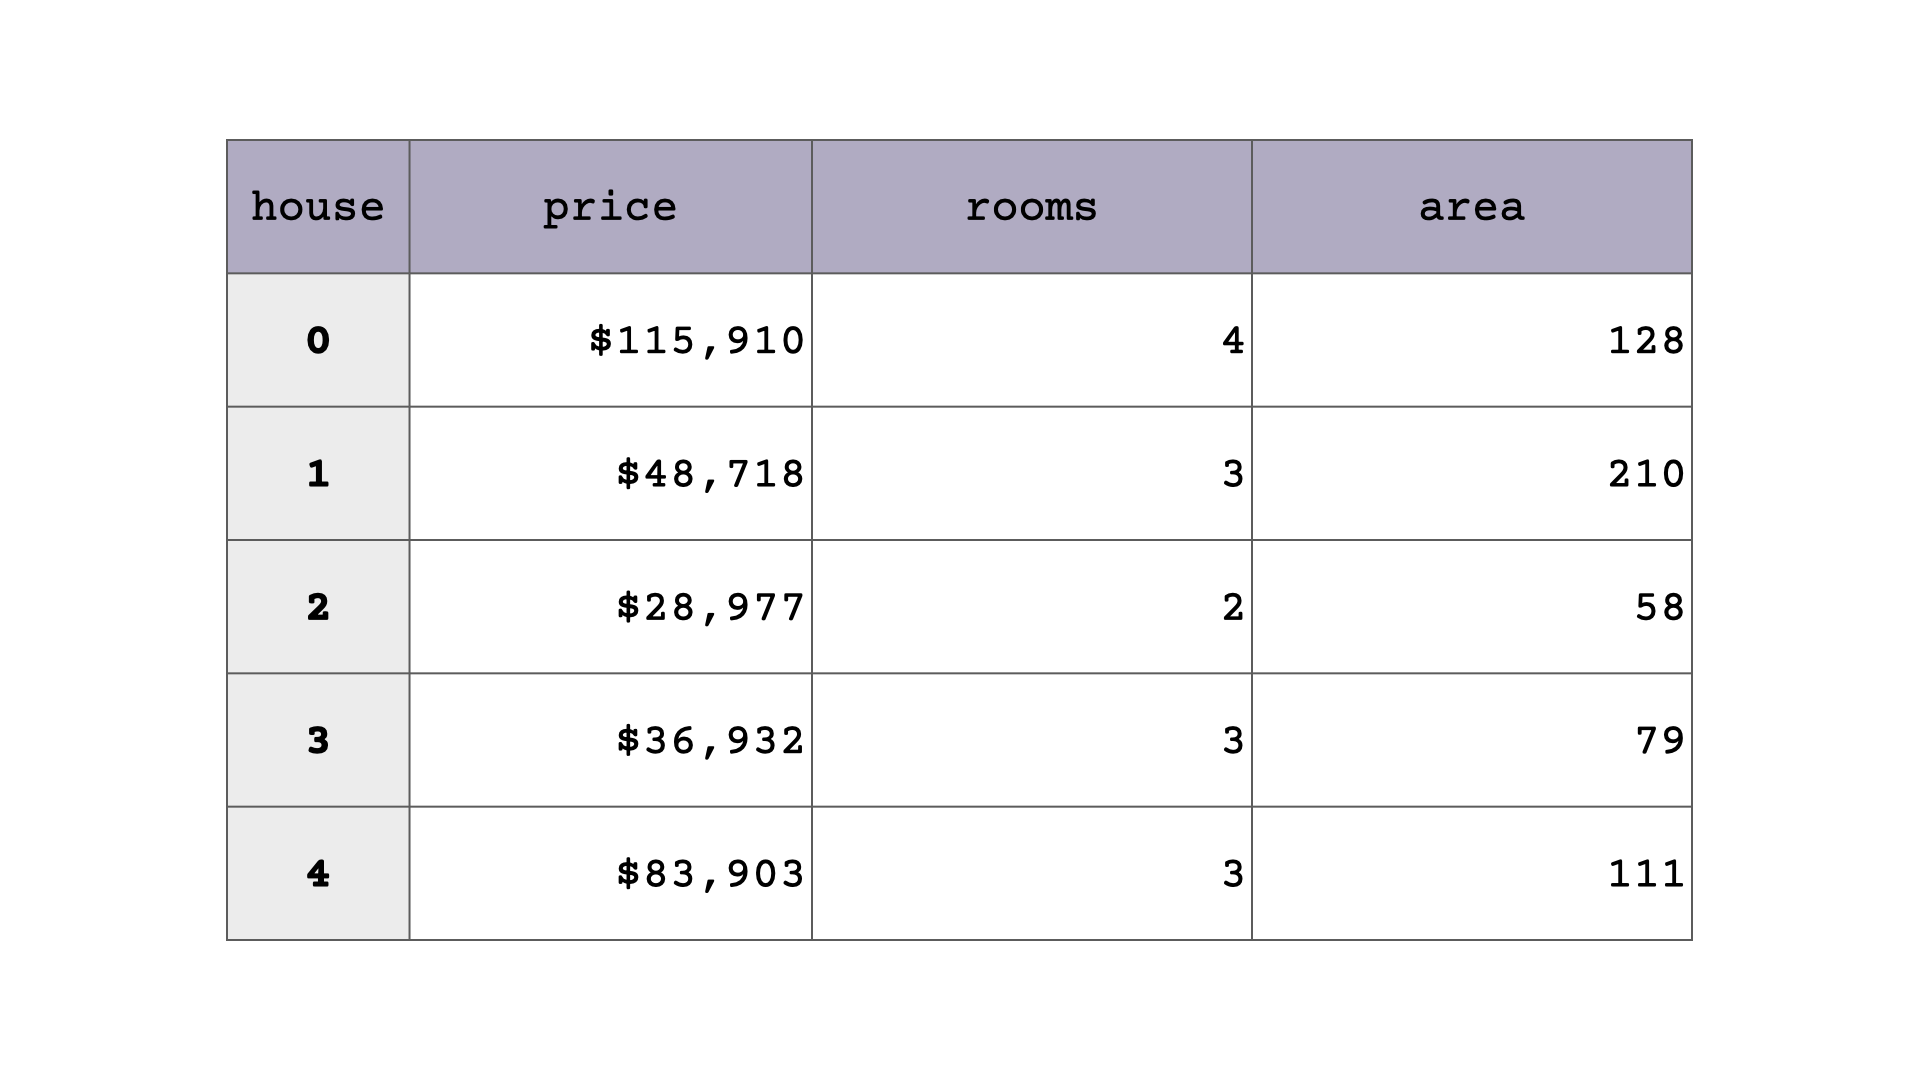

When working with this sort of tabular data, it's important to organize row and columns following the principles of "tidy data." What does that mean in the case of our dataset?

Each row corresponds to a single house in our dataset. We'll call each of these houses an observation.
Each column corresponds to a characteristic of each house. We'll call these features.
Each cell contains only one value.



##  Tabular Data and Python Data Structures¶

## Working with Lists

Python comes with several data structures that we can use to organize tabular data. Let's start by putting a single observation in a **list**.

In [1]:
# declare variable house_0_list
house_0_list=[115910,4,128]
print(house_0_list)
print(len(house_0_list))

[115910, 4, 128]
3


 One metric that people in the real estate industry look at is price per square meter because it allows them to compare houses of different sizes.

In [2]:
# declare variable house_0_price_m2
house_0_price_m2=house_0_list[0]/house_0_list[2]
house_0_price_m2

905.546875

let's  use the append method to add the price per square meter to the end of the end of house_0.

In [3]:
house_0_list.append(house_0_price_m2)
house_0_list

[115910, 4, 128, 905.546875]

Now that you can work with data for a single house, let's think about how to organize the whole dataset. One option would be to create a list for each observation and then put those together in another list. This is called a nested list.

In [4]:
house_nested_list=[
    [115910,4,128],
    [48718,3,210],
    [28977,2,58],
    [36972,3,79],
    [83903,3,111],
]
house_nested_list

[[115910, 4, 128],
 [48718, 3, 210],
 [28977, 2, 58],
 [36972, 3, 79],
 [83903, 3, 111]]

Now that we have more observations, it doesn't make sense to calculate the price per square meter for each house one-by-one. Instead, we can automate this repetitive task using a for loop.

In [5]:
for house in house_nested_list:
    price_m2=house[0]/house[2]
    house.append(price_m2)
house_nested_list    

[[115910, 4, 128, 905.546875],
 [48718, 3, 210, 231.9904761904762],
 [28977, 2, 58, 499.6034482758621],
 [36972, 3, 79, 468.0],
 [83903, 3, 111, 755.8828828828829]]

## Working with Dictionaries

Lists are a good way to organize data, but one drawback is that we can only represent values. Why is that a problem? For example, someone looking at `[115910.26, 128.0, 4]` wouldn't know which values corresponded to price, area, etc. A better option might be a [**dictionary**](http://127.0.0.1:8888/lab/tree/work/ds_curriculum/%40textbook/Python.ipynb#whats-a-dictionary), where each value is associated with a key. Here's what `house_0` looks like as a dictionary instead of a list.

In [6]:
# declaire a vailable house_0_dict
house_0_dict={
    'price_approx_usd':115910,
    'surface_covered_in_m2':128,
    'rooms':4,
    
    
}
house_0_dict

{'price_approx_usd': 115910, 'surface_covered_in_m2': 128, 'rooms': 4}

let's calculate the price per square kilometer 

In [7]:
house_0_dict["price_per_m2"] = (
    house_0_dict["price_approx_usd"] / house_0_dict["surface_covered_in_m2"]
)
house_0_dict

{'price_approx_usd': 115910,
 'surface_covered_in_m2': 128,
 'rooms': 4,
 'price_per_m2': 905.546875}

If we wanted to combine all our observations together, the best way would be to create a list of dictionaries.

In [8]:
# Declare variable `houses_rowwise`
houses_rowwise = [
    {
        "price_approx_usd": 115910.26,
        "surface_covered_in_m2": 128,
        "rooms": 4,
    },
    {
        "price_approx_usd": 48718.17,
        "surface_covered_in_m2": 210,
        "rooms": 3,
    },
    {
        "price_approx_usd": 28977.56,
        "surface_covered_in_m2": 58,
        "rooms": 2,
    },
    {
        "price_approx_usd": 36932.27,
        "surface_covered_in_m2": 79,
        "rooms": 3,
    },
    {
        "price_approx_usd": 83903.51,
        "surface_covered_in_m2": 111,
        "rooms": 3,
    },
]
houses_rowwise

[{'price_approx_usd': 115910.26, 'surface_covered_in_m2': 128, 'rooms': 4},
 {'price_approx_usd': 48718.17, 'surface_covered_in_m2': 210, 'rooms': 3},
 {'price_approx_usd': 28977.56, 'surface_covered_in_m2': 58, 'rooms': 2},
 {'price_approx_usd': 36932.27, 'surface_covered_in_m2': 79, 'rooms': 3},
 {'price_approx_usd': 83903.51, 'surface_covered_in_m2': 111, 'rooms': 3}]

JSON is a great way to organize data, but it does have some downsides. Note that each dictionary represents a single house or, if we think about it as tabular data, a row in our dataset. This means that it's pretty easy to do row-wise calculations (like we did with price per square meter), but column-wise calculations are more complicated. For instance, what if we wanted to know the mean house price for our dataset? First we'd need to collect the price for each house in a list and then calculate mean.

In [2]:
house_columnwise={
    "price_approx_usd": [115910.26, 48718.17, 28977.56, 36932.27, 83903.51],
    "surface_covered_in_m2": [128.0, 210.0, 58.0, 79.0, 111.0],
    "rooms": [4.0, 3.0, 2.0, 3.0, 3.0],
}

house_columnwise

{'price_approx_usd': [115910.26, 48718.17, 28977.56, 36932.27, 83903.51],
 'surface_covered_in_m2': [128.0, 210.0, 58.0, 79.0, 111.0],
 'rooms': [4.0, 3.0, 2.0, 3.0, 3.0]}

In [4]:
import pandas as pd 
df=pd.DataFrame(house_columnwise)
df

,price_approx_usd,surface_covered_in_m2,rooms
0,115910.26,128.0,4.0
1,48718.17,210.0,3.0
2,28977.56,58.0,2.0
3,36932.27,79.0,3.0
4,83903.51,111.0,3.0


In [6]:
df['price_per_m2']=df['price_approx_usd']/df['surface_covered_in_m2']
df

,price_approx_usd,surface_covered_in_m2,rooms,price_per_m2
0,115910.26,128.0,4.0,905.548906
1,48718.17,210.0,3.0,231.991286
2,28977.56,58.0,2.0,499.613103
3,36932.27,79.0,3.0,467.497089
4,83903.51,111.0,3.0,755.887477
